In [354]:
import numpy as np 
import pandas as pd

In [355]:
df = pd.read_csv("E:\\AMIT - Assignments and Materials\\AI ONL 104\\ML\\train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### first 5 min

In [356]:
df.shape

(614, 13)

In [357]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [359]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [360]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning and Data_preprocessing

In [361]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### dealing with missing data 

In [362]:
#detect nulls 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [363]:
# Loan_ID is just an identifier → drop it before training.
df = df.drop('Loan_ID', axis=1)

In [364]:
# deal with missing data 
# Numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2899699351.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2899699351.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [365]:
# Categorical columns
cat_cols = ['Gender', 'Dependents', 'Self_Employed']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2536685352.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [366]:
df = df.dropna(subset=['Married'])


In [367]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### detect duplicates

In [368]:
# detect duplicates
df.duplicated().sum()

np.int64(0)

In [369]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [370]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [371]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [372]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [373]:
df['Dependents'].unique()

array([0., 1., 2., 3.])

In [374]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [375]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [376]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

## Encoding categorical features 

In [ ]:

# List of categorical columns including the target
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 
            'Property_Area', 'Loan_Status']


label_maps = {}

for col in cat_cols:
    encoded, uniques = pd.factorize(df[col])
    df[col] = encoded
    label_maps[col] = uniques       


In [378]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,0,0
1,0,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,0,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,0,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,0,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,1,0
610,0,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,1,0
611,0,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,0,0
612,0,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,0,0


## feature Engineering

In [379]:
# ApplicantIncome + CoapplicantIncome can be combined into a TotalIncome feature.
df['TotalIncome '] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop('ApplicantIncome', axis=1)
df = df.drop('CoapplicantIncome', axis=1)


In [380]:
# create Loan_Term_Years
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Loan_Amount_Term_Years'] = df['Loan_Amount_Term'] / 12
df = df.drop('Loan_Amount_Term', axis=1)


In [381]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_Term_Years
0,0,0,0.0,0,0,128.0,1.0,0,0,5849.0,30.0
1,0,1,1.0,0,0,128.0,1.0,1,1,6091.0,30.0
2,0,1,0.0,0,1,66.0,1.0,0,0,3000.0,30.0
3,0,1,0.0,1,0,120.0,1.0,0,0,4941.0,30.0
4,0,0,0.0,0,0,141.0,1.0,0,0,6000.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,0,0,71.0,1.0,1,0,2900.0,30.0
610,0,1,3.0,0,0,40.0,1.0,1,0,4106.0,15.0
611,0,1,1.0,0,0,253.0,1.0,0,0,8312.0,30.0
612,0,1,2.0,0,0,187.0,1.0,0,0,7583.0,30.0


## Detect and Handle Outliers

In [389]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_Term_Years
0,0,0,0.0,0,0,128.0,1.0,0,0,5849.0,30.0
1,0,1,1.0,0,0,128.0,1.0,1,1,6091.0,30.0
2,0,1,0.0,0,1,66.0,1.0,0,0,3000.0,30.0
3,0,1,0.0,1,0,120.0,1.0,0,0,4941.0,30.0
4,0,0,0.0,0,0,141.0,1.0,0,0,6000.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,0,0,71.0,1.0,1,0,2900.0,30.0
610,0,1,3.0,0,0,40.0,1.0,1,0,4106.0,15.0
611,0,1,1.0,0,0,253.0,1.0,0,0,8312.0,30.0
612,0,1,2.0,0,0,187.0,1.0,0,0,7583.0,30.0


In [390]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome ', 'Loan_Amount_Term_Years'],
      dtype='object')

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  611 non-null    int64  
 1   Married                 611 non-null    int64  
 2   Dependents              611 non-null    float64
 3   Education               611 non-null    int64  
 4   Self_Employed           611 non-null    int64  
 5   LoanAmount              611 non-null    float64
 6   Credit_History          611 non-null    float64
 7   Property_Area           611 non-null    int64  
 8   Loan_Status             611 non-null    int64  
 9   TotalIncome             611 non-null    float64
 10  Loan_Amount_Term_Years  611 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 57.3 KB


In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [395]:
df['Loan_Amount_Term_Years'].value_counts()

Loan_Amount_Term_Years
30.0    525
15.0     44
40.0     14
25.0     13
7.0       4
10.0      3
20.0      3
5.0       2
3.0       2
1.0       1
Name: count, dtype: int64

In [ ]:
# valid_terms = [10, 15, 20, 25, 30, 40]
# df = df[df['Loan_Amount_Term_Years'].isin(valid_terms)]


In [393]:
# detect outliers manually
q1 = df['Loan_Amount_Term_Years'].quantile(0.25)
q3 = df['Loan_Amount_Term_Years'].quantile(0.75)
IQR = q3 - q1
IQR

wisk_min = q1 - 1.5 * IQR
wisk_max = q3 + 1.5 * IQR

df[(df['Loan_Amount_Term_Years'] < wisk_min) | (df['Loan_Amount_Term_Years'] > wisk_max)]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_Term_Years
14,0,1,2.0,0,0,17.0,1.0,0,0,2385.0,10.0
16,0,0,1.0,1,0,100.0,1.0,0,0,3596.0,20.0
62,0,1,0.0,1,1,165.0,0.0,1,1,6058.0,15.0
66,0,0,0.0,1,0,126.0,0.0,0,1,5454.0,15.0
68,0,1,3.0,1,1,125.0,1.0,0,0,7100.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
591,0,1,2.0,0,1,205.0,1.0,2,1,6000.0,20.0
593,0,1,0.0,0,0,142.0,1.0,1,0,7159.0,15.0
600,1,0,3.0,0,0,350.0,1.0,0,1,42083.0,15.0
605,0,1,0.0,1,0,128.0,1.0,0,1,6200.0,15.0


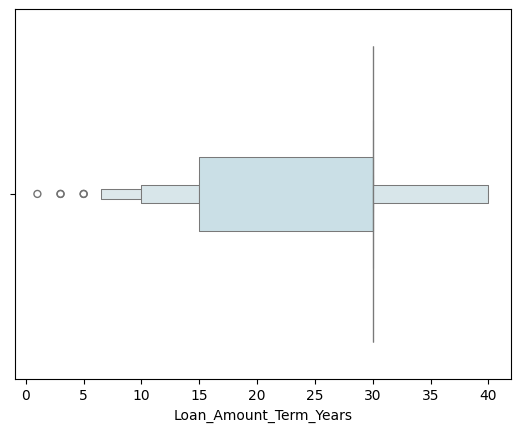

In [394]:
sns.boxenplot(x=df['Loan_Amount_Term_Years'], color='lightblue')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# TASK: Scale the data

scaler = StandardScaler()
numerical_cols = [col for col in X_train.columns ] # list comprehenssion for numerical columns

# Fit on training data
scaler.fit(X_train[numerical_cols])

X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
# Transform both training and testing data

print("Scaled training data head:")
display(X_train.head())

## Splitting (Train-Test Split)

In [ ]:
# Features
X = df.drop(columns=['Loan_Status'])

# Target
y = df['Loan_Status']


In [398]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (427, 10)
X_test shape: (184, 10)


## Scaling

In [402]:
from sklearn.preprocessing import StandardScaler

# TASK: Scale the data

scaler = StandardScaler()
numerical_cols = [col for col in X_train.columns ] # list comprehenssion for numerical columns

# Fit on training data
scaler.fit(X_train[numerical_cols])

X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
# Transform both training and testing data

print("Scaled training data head:")
display(X_train.head())

Scaled training data head:


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,TotalIncome,Loan_Amount_Term_Years
168,-0.461593,-1.345069,-0.707751,-0.538545,-0.404336,-0.984274,-2.359922,1.111160,-0.757184,2.198608
54,2.166410,0.743456,0.292943,-0.538545,2.473190,1.710868,-2.359922,-1.297294,0.751953,0.271272
568,2.166410,-1.345069,-0.707751,-0.538545,-0.404336,-1.636909,0.423743,-1.297294,-0.734212,0.271272
46,-0.461593,0.743456,0.292943,-0.538545,-0.404336,-1.213905,0.423743,-1.297294,-0.201297,0.271272
93,-0.461593,-1.345069,-0.707751,-0.538545,-0.404336,-0.271210,0.423743,1.111160,-0.448285,0.271272
